<!-- Table of Contents -->

## Contents
- Hourly consumption (last complete local day, 24 hours)
- Daily consumption (last 7 days)
- Hourly temperature (last complete local day, 24 hours)
- Daily temperature (last 7 days preview)
- Regression (daily consumption ~ daily avg temperature)
- Bias correction factors
- Temperature forecast (next 7 days)
- Daily consumption forecast (next 7 days)
- Weekday load profiles (24×7 share matrix)
- Hourly consumption forecast (next 7 days)
- **Hourly consumption forecast (next 7 days)** — ℹ️ **Tip:** If you only need the hourly forecast, run **this script only**; the earlier steps are not required.

In [27]:
import json, pathlib

p = pathlib.Path("ecf_runner.ipynb")  # <-- muuda vajadusel
nb = json.loads(p.read_text(encoding="utf-8"))

def replace_all(s: str) -> str:
    return (s
      .replace("`talv`, `kevad`, `suvi`, `sügis`", "`winter`, `spring`, `summer`, `autumn`")
      .replace("`workday:talv`", "`workday:winter`")
      .replace("(A) Keritava tabeli helper – ei trunkeeri pikka väljundit", "(A) Scrollable table helper — avoids truncated long outputs")
      .replace("(B) Pandas kuvamisvalikud (soovi korral kohanda)", "(B) Pandas display options (tune if needed)")
      .replace("Käivita tunniprognoos", "Run hourly forecast")
      .replace("Keritav eelvaade (esimesed 200 rida)", "Scrollable preview (first 200 rows)")
      .replace("Summa-kontroll: tunnid -> päev", "Sum check: hours \u2192 day")
      .replace("Graafik JOONENA: esimene prognoosipäev", "LINE chart: first forecast day")
    )

changed = 0
for cell in nb.get("cells", []):
    src = "".join(cell.get("source", []))
    new_src = replace_all(src)
    if new_src != src:
        cell["source"] = [new_src]
        changed += 1

p.write_text(json.dumps(nb, ensure_ascii=False, indent=1), encoding="utf-8")
print(f"Patched {changed} cell(s) in {p}")


FileNotFoundError: [Errno 2] No such file or directory: 'scripts\\ecf_runner.ipynb'

## How to use — Hourly consumption (last complete local day, 24 hours)

**What this cell does**
- Imports hourly consumption via `elering_consumption.get_hourly_consumption(...)` in **Europe/Tallinn**.
- Finds the **last local calendar day that has exactly 24 hourly records** (skips DST 23/25-hour days).
- Shows a **24-row table**, draws a **line chart**, prints **dtypes** and **`.info()`**.
- Optionally saves a CSV of that day to `./output/`.

**Before you run**
- Keep this notebook in the **same folder** as `elering_consumption.py` (or adjust `SCRIPTS_DIR` in the cell).
- Python packages: `pandas`, `matplotlib`, `holidays` (recommended).
- Today is **excluded** by default to avoid partial days (you can change it).

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `EXCLUDE_TODAY`: `True` to exclude today’s (possibly partial) data.
- `SAVE_CSV`: `True` to write the day slice to `./output/`.

**Run**
- Execute the cell once. You’ll see:
  - A **24-row** table for the last complete local day,
  - A **line chart** of hourly values,
  - Printed **shape**, **time range**, **dtypes**, and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/elering_hourly_last_complete_day_YYYYMMDD.csv` — the 24-hour slice for that local date.

**Customize**
- No complete 24-hour day found? (e.g., due to DST 23/25-hour days)  
  – Increase `MONTHS`, or switch to a **calendar-day slice** (00:00–23:00 even if 23/25 rows),  
  – or use the **rolling 24h** preview cell if you specifically want “last 24 hours” regardless of date boundaries.

**Troubleshooting**
- *ImportError:* ensure `elering_consumption.py` is in the same directory or adjust `sys.path`.
- *Empty preview:* widen the history window (`MONTHS`) or verify the data range printed by the cell.


Last complete local day: 2025-09-21 (rows: 24)


,sum_cons_time,sum_el_hourly_value,imputed,weekday,is_weekend,is_holiday
0,2025-09-21 00:00:00+03:00,708.0,False,Sunday,True,False
1,2025-09-21 01:00:00+03:00,681.6,False,Sunday,True,False
2,2025-09-21 02:00:00+03:00,659.7,False,Sunday,True,False
3,2025-09-21 03:00:00+03:00,645.9,False,Sunday,True,False
4,2025-09-21 04:00:00+03:00,649.5,False,Sunday,True,False
5,2025-09-21 05:00:00+03:00,653.1,False,Sunday,True,False
6,2025-09-21 06:00:00+03:00,679.2,False,Sunday,True,False
7,2025-09-21 07:00:00+03:00,740.7,False,Sunday,True,False
8,2025-09-21 08:00:00+03:00,813.4,False,Sunday,True,False
9,2025-09-21 09:00:00+03:00,882.8,False,Sunday,True,False


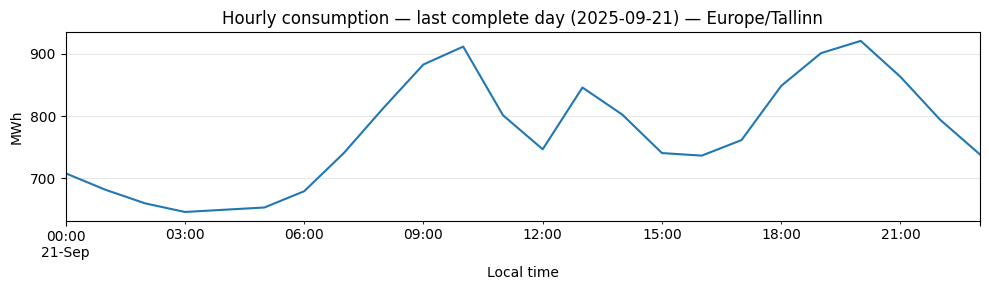

=== HOURLY (FULL DAY): dtypes ===
sum_cons_time          datetime64[ns, Europe/Tallinn]
sum_el_hourly_value                           float64
imputed                                          bool
weekday                                        object
is_weekend                                       bool
is_holiday                                       bool
dtype: object

=== HOURLY (ALL): dtypes ===
sum_cons_time          datetime64[ns, Europe/Tallinn]
sum_el_hourly_value                           float64
imputed                                          bool
weekday                                        object
is_weekend                                       bool
is_holiday                                       bool
dtype: object

=== HOURLY (ALL): .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17543 entries, 0 to 17542
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype                         
---  ------               --------------  ----- 

In [3]:
# --- Hourly consumption: last COMPLETE 24-hour local day (Europe/Tallinn) ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from elering_consumption import get_hourly_consumption
except Exception as e:
    raise ImportError(f"Could not import elering_consumption.py from {SCRIPTS_DIR}: {e}")

# 1) Load hourly data (tz-aware; Europe/Tallinn)
df_hourly = get_hourly_consumption(
    months=MONTHS,
    tz=TZ,
    exclude_today=EXCLUDE_TODAY,
    add_weekday=True,
    add_holidays=True,
    impute_missing=True,
)

if df_hourly.empty:
    raise RuntimeError("No hourly data loaded. Widen the history window or check the source.")

# 2) Find the last COMPLETE 24-hour local day (skip 23/25h DST days)
idxed = df_hourly.set_index("sum_cons_time").sort_index()

work = idxed.copy()
work["date_local"] = work.index.tz_convert(TZ).date  # add as a column to avoid future groupby warnings
counts = work.groupby("date_local").size()           # number of hours per local date
full_dates = counts[counts == 24]

if full_dates.empty:
    raise RuntimeError(
        "No complete 24-hour local day found in the current window. "
        "Try increasing MONTHS or use a calendar-day slice instead."
    )

last_full_date = full_dates.index.max()  # datetime.date
day_start = pd.Timestamp(last_full_date, tz=TZ)
day_end   = day_start + pd.Timedelta(days=1)

day_slice = idxed.loc[day_start:day_end - pd.Timedelta(seconds=1)].reset_index()

# 3) Preview (24 rows)
print(f"Last complete local day: {last_full_date} (rows: {len(day_slice)})")
display(day_slice)

# 4) Line plot of that day
ax = (day_slice.set_index("sum_cons_time")["sum_el_hourly_value"]
                 .plot(figsize=(10, 3),
                       title=f"Hourly consumption — last complete day ({last_full_date}) — {TZ}"))
ax.set_xlabel("Local time")
ax.set_ylabel("MWh")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5) Data types & quick info
print("=== HOURLY (FULL DAY): dtypes ===")
print(day_slice.dtypes)
print("\n=== HOURLY (ALL): dtypes ===")
print(df_hourly.dtypes)
print("\n=== HOURLY (ALL): .info() ===")
df_hourly.info()

# 6) Optional: save the 24-hour slice (and full dataset, if you want)
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    out_day = OUTDIR / f"elering_hourly_last_complete_day_{last_full_date:%Y%m%d}.csv"
    day_slice.to_csv(out_day, index=False)
    print(f"\n[saved] {out_day}")
    # Uncomment if you also want to save the full hourly dataset:
    # df_hourly.to_csv(OUTDIR / "elering_hourly_all.csv", index=False)


## How to use — Daily consumption (last 7 days)

**What this cell does**
- Imports **daily** consumption via `elering_consumption.get_daily_consumption(...)` on the **Europe/Tallinn** calendar.
- Shows a **7-day preview**, draws a **bar chart**, prints **dtypes** and **`.info()`**.
- Optionally saves **two CSVs** to `./output/`: the **full daily dataset** and the **7-day preview**.

**Before you run**
- Notebook in the **same folder** as `elering_consumption.py`.
- Python packages: `pandas`, `matplotlib`, `holidays` (recommended).
- Today is **excluded** by default (avoids partial days).

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `EXCLUDE_TODAY`: `True` to exclude today.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.

**Run**
- Execute the cell once. You’ll see:
  - A small table with the **last 7 days**.
  - A **bar chart** of daily totals.
  - Printed **shape**, **date range**, **dtypes**, and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/elering_daily_all.csv` — full daily dataset (EE calendar).
- `output/elering_daily_last7d_preview.csv` — only the last 7 days.

**Customize**
- Different preview window? Adjust the **start offset** used for the inclusive slice.  
  For exactly **N** days use `start = end - pd.Timedelta(days=N-1)` (this notebook uses `6` to get 7 rows).
- Include today? Set `EXCLUDE_TODAY=False`.
- Different chart type? Replace `kind="bar"` with `line` if you prefer a line chart.

**Troubleshooting**
- *ImportError:* ensure `elering_consumption.py` is reachable.
- *Empty preview:* verify the printed date range covers the last 7 days; adjust `MONTHS` or filters if needed.


,sum_cons_date,sum_el_daily_value,weekday,is_weekend,is_holiday
0,2025-09-15,20982.5,Monday,False,False
1,2025-09-16,20840.2,Tuesday,False,False
2,2025-09-17,19662.1,Wednesday,False,False
3,2025-09-18,20404.1,Thursday,False,False
4,2025-09-19,19503.6,Friday,False,False
5,2025-09-20,20107.5,Saturday,True,False
6,2025-09-21,18524.8,Sunday,True,False


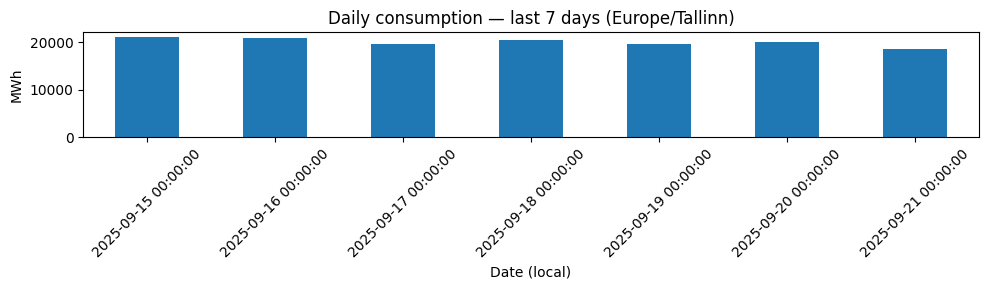

=== DAILY: shape === (731, 5)
=== DAILY: date range === 2023-09-22 00:00:00 → 2025-09-21 00:00:00

=== DAILY: dtypes ===
sum_cons_date         datetime64[ns]
sum_el_daily_value           float64
weekday                       object
is_weekend                      bool
is_holiday                      bool
dtype: object

=== DAILY: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sum_cons_date       731 non-null    datetime64[ns]
 1   sum_el_daily_value  731 non-null    float64       
 2   weekday             731 non-null    object        
 3   is_weekend          731 non-null    bool          
 4   is_holiday          731 non-null    bool          
dtypes: bool(2), datetime64[ns](1), float64(1), object(1)
memory usage: 18.7+ KB

[saved] output\elering_daily_all.csv
[saved] output\elering_daily_last7d_previ

In [4]:
# --- Daily consumption: preview last 7 days + plot + dtypes + optional CSV (no FutureWarning) ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

from elering_consumption import get_daily_consumption

# Load daily data (Europe/Tallinn calendar)
df_daily = get_daily_consumption(
    months=MONTHS,
    tz=TZ,
    exclude_today=EXCLUDE_TODAY,
    add_weekday=True,
    add_holidays=True,
    impute_missing_hourly=True,
).copy()

# Make sure the date column is datetime for safe slicing
df_daily["sum_cons_date"] = pd.to_datetime(df_daily["sum_cons_date"], errors="coerce")

# Build an EXACT 7-day window (inclusive slice): end_d - 6 days .. end_d  -> 7 rows total
idxed_d = df_daily.set_index("sum_cons_date").sort_index()
if idxed_d.empty:
    raise RuntimeError("No daily data available to preview.")
end_d = idxed_d.index.max()
start_d = end_d - pd.Timedelta(days=6)   # <-- was 7; use 6 to get exactly 7 days inclusive
last_7d = idxed_d.loc[start_d:end_d].reset_index()

# Preview
display(last_7d)

# Plot: last 7 days (bar)
ax = (last_7d.set_index("sum_cons_date")["sum_el_daily_value"]
               .plot(kind="bar", figsize=(10, 3),
                     title="Daily consumption — last 7 days (Europe/Tallinn)", rot=45))
ax.set_xlabel("Date (local)")
ax.set_ylabel("MWh")
plt.tight_layout()
plt.show()

# Data types & quick info
print("=== DAILY: shape ===", df_daily.shape)
print("=== DAILY: date range ===", df_daily["sum_cons_date"].min(), "→", df_daily["sum_cons_date"].max())
print("\n=== DAILY: dtypes ===")
print(df_daily.dtypes)
print("\n=== DAILY: .info() ===")
df_daily.info()

# Optional: save CSVs
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    df_daily.to_csv(OUTDIR / "elering_daily_all.csv", index=False)
    last_7d.to_csv(OUTDIR / "elering_daily_last7d_preview.csv", index=False)
    print(f"\n[saved] {OUTDIR/'elering_daily_all.csv'}")
    print(f"[saved] {OUTDIR/'elering_daily_last7d_preview.csv'}")


## How to use — Hourly temperature (last complete local day, 24 hours)

**What this cell does**
- Imports **hourly temperature** via `meteostat_temperature.get_hourly_temperature(...)` on **Europe/Tallinn** time.
- Finds the **last local calendar day that has exactly 24 hourly records** (skips DST 23/25-hour days).
- Shows a **24-row table**, draws a **line chart**, prints **dtypes** and **`.info()`**.
- Optionally saves a CSV of that day to `./output/`.

**Before you run**
- This notebook should be in the **same folder** as `meteostat_temperature.py` (or adjust `SCRIPTS_DIR`).
- Python packages: `pandas`, `matplotlib`, `meteostat`.

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `EXCLUDE_TODAY`: `True` to exclude today’s partial data.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.

**Run**
- Execute the cell once. You’ll see:
  - A **24-row** table for the **last complete local day** (`hour_temp_time`, `hour_temp_value` in °C),
  - A **line chart** of that day,
  - Printed **shape**, **time range**, **dtypes**, and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/meteostat_hourly_temp_last_complete_day_YYYYMMDD.csv` — the 24-hour slice for that local date.

**Customize**
- No complete 24-hour day found? Increase `MONTHS`, or switch to a **calendar-day slice** (00:00–23:00 even if 23/25 rows), or use a **rolling 24h** preview.
- Include today? Set `EXCLUDE_TODAY=False` (not recommended if today is partial).

**Troubleshooting**
- *ImportError:* ensure `meteostat_temperature.py` is reachable.
- *Empty preview:* widen `MONTHS` or verify the printed time range covers the desired period.


Last complete local day (temperature): 2025-09-21 (rows: 24)


,hour_temp_time,hour_temp_value
0,2025-09-21 00:00:00+03:00,16.08
1,2025-09-21 01:00:00+03:00,16.02
2,2025-09-21 02:00:00+03:00,15.88
3,2025-09-21 03:00:00+03:00,15.64
4,2025-09-21 04:00:00+03:00,15.9
5,2025-09-21 05:00:00+03:00,15.96
6,2025-09-21 06:00:00+03:00,15.88
7,2025-09-21 07:00:00+03:00,15.82
8,2025-09-21 08:00:00+03:00,16.1
9,2025-09-21 09:00:00+03:00,16.4


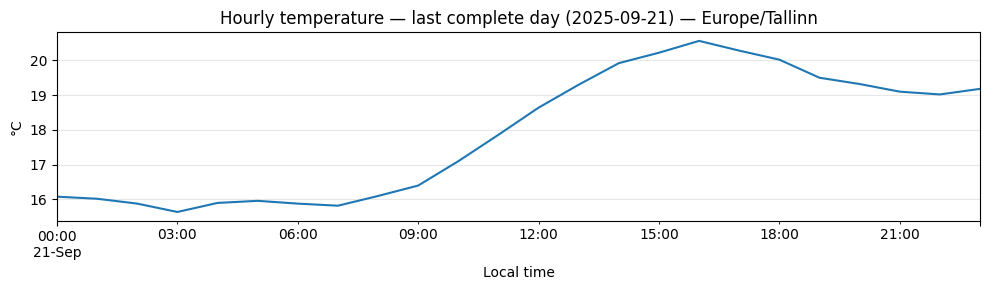

=== HOURLY TEMP (FULL DAY): dtypes ===
hour_temp_time     datetime64[ns, Europe/Tallinn]
hour_temp_value                           Float64
dtype: object

=== HOURLY TEMP (ALL): dtypes ===
hour_temp_time     datetime64[ns, Europe/Tallinn]
hour_temp_value                           Float64
dtype: object

=== HOURLY TEMP (ALL): .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17545 entries, 0 to 17544
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype                         
---  ------           --------------  -----                         
 0   hour_temp_time   17545 non-null  datetime64[ns, Europe/Tallinn]
 1   hour_temp_value  17545 non-null  Float64                       
dtypes: Float64(1), datetime64[ns, Europe/Tallinn](1)
memory usage: 291.4 KB

[saved] output\meteostat_hourly_temp_last_complete_day_20250921.csv


In [5]:
# --- Hourly temperature: last COMPLETE 24-hour local day (Europe/Tallinn) ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from meteostat_temperature import get_hourly_temperature
except Exception as e:
    raise ImportError(f"Could not import meteostat_temperature.py from {SCRIPTS_DIR}: {e}")

# 1) Load hourly temperature (tz-aware; Europe/Tallinn)
df_hourly_t = get_hourly_temperature(
    months=MONTHS,
    tz=TZ,
    exclude_today=EXCLUDE_TODAY,
)

if df_hourly_t.empty:
    raise RuntimeError("No hourly temperature data loaded. Widen the history window or check the source.")

# 2) Find the last COMPLETE 24-hour local day (skip 23/25h DST days)
idxed = df_hourly_t.set_index("hour_temp_time").sort_index()

work = idxed.copy()
work["date_local"] = work.index.tz_convert(TZ).date  # add as a column to avoid future groupby warnings
counts = work.groupby("date_local").size()           # number of hours per local date
full_dates = counts[counts == 24]

if full_dates.empty:
    raise RuntimeError(
        "No complete 24-hour local day found in the current window. "
        "Increase MONTHS or use a calendar-day slice instead."
    )

last_full_date = full_dates.index.max()  # datetime.date
day_start = pd.Timestamp(last_full_date, tz=TZ)
day_end   = day_start + pd.Timedelta(days=1)

day_slice = idxed.loc[day_start:day_end - pd.Timedelta(seconds=1)].reset_index()

# 3) Preview (24 rows)
print(f"Last complete local day (temperature): {last_full_date} (rows: {len(day_slice)})")
display(day_slice)

# 4) Line plot of that day
ax = (day_slice.set_index("hour_temp_time")["hour_temp_value"]
                 .plot(figsize=(10, 3),
                       title=f"Hourly temperature — last complete day ({last_full_date}) — {TZ}"))
ax.set_xlabel("Local time")
ax.set_ylabel("°C")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5) Data types & quick info
print("=== HOURLY TEMP (FULL DAY): dtypes ===")
print(day_slice.dtypes)
print("\n=== HOURLY TEMP (ALL): dtypes ===")
print(df_hourly_t.dtypes)
print("\n=== HOURLY TEMP (ALL): .info() ===")
df_hourly_t.info()

# 6) Optional: save the 24-hour slice (and full dataset, if you want)
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    out_day = OUTDIR / f"meteostat_hourly_temp_last_complete_day_{last_full_date:%Y%m%d}.csv"
    day_slice.to_csv(out_day, index=False)
    print(f"\n[saved] {out_day}")
    # Uncomment if you also want to save the full hourly dataset:
    # df_hourly_t.to_csv(OUTDIR / "meteostat_hourly_temp_all.csv", index=False)


## How to use — Daily temperature (last 7 days preview)

**What this cell does**
- Imports **daily average temperature** via `meteostat_temperature.get_daily_temperature(...)` on the **Europe/Tallinn** calendar.
- Shows an **exact 7-day preview**, draws a **line (or bar) chart**, and prints **dtypes** and **`.info()`**.
- Optionally saves **two CSVs** to `./output/`: the **full daily dataset** and the **7-day preview**.

**Before you run**
- Place the notebook in the **same folder** as `meteostat_temperature.py`.
- Python packages: `pandas`, `matplotlib`, `meteostat`.

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `EXCLUDE_TODAY`: `True` to exclude today.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.

**Run**
- Execute the cell once. You’ll see:
  - A table with the **last 7 days** (`avg_day_temp_date`, `hour_day_value` in °C).
  - A **chart** of daily averages (default: line).
  - Printed **shape**, **date range**, **dtypes**, and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/meteostat_daily_temp_all.csv` — full daily temperature dataset (EE calendar).
- `output/meteostat_daily_temp_last7d_preview.csv` — only the last 7 days.

**Customize**
- Exact window logic uses an **inclusive** slice `start..end`.  
  For **N** days, set `start = end - pd.Timedelta(days=N-1)` (this notebook uses `N=7` → `end - 6 days`).
- Prefer a bar chart? Change `.plot(kind="line", ...)` to `kind="bar"`.
- Include today? Set `EXCLUDE_TODAY=False`.

**Troubleshooting**
- *ImportError:* ensure `meteostat_temperature.py` is reachable.
- *Empty preview:* increase `MONTHS` or verify the printed date range covers the last 7 days.


Rows returned: 7 (target: 7)


,avg_day_temp_date,hour_day_value
0,2025-09-15,15.0875
1,2025-09-16,14.975
2,2025-09-17,14.930833
3,2025-09-18,13.685
4,2025-09-19,14.418333
5,2025-09-20,15.356667
6,2025-09-21,17.904167


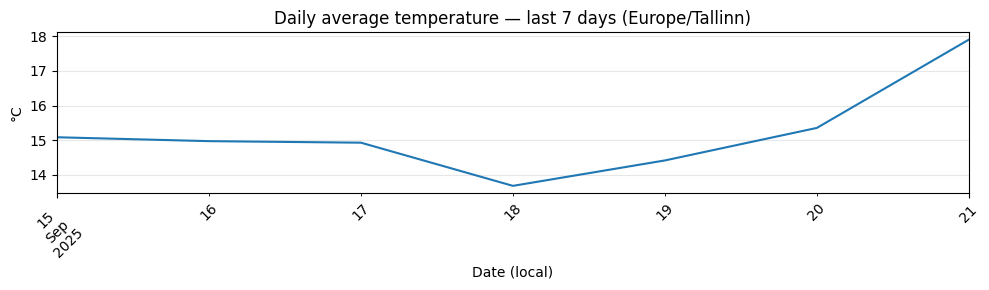

=== DAILY TEMP: shape === (731, 2)
=== DAILY TEMP: date range === 2023-09-22 00:00:00 → 2025-09-21 00:00:00

=== DAILY TEMP: dtypes ===
avg_day_temp_date    datetime64[ns]
hour_day_value              Float64
dtype: object

=== DAILY TEMP: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   avg_day_temp_date  731 non-null    datetime64[ns]
 1   hour_day_value     731 non-null    Float64       
dtypes: Float64(1), datetime64[ns](1)
memory usage: 12.3 KB

[saved] output\meteostat_daily_temp_all.csv
[saved] output\meteostat_daily_temp_last7d_preview.csv


In [6]:
# --- Daily temperature: exact last 7 days + line plot + dtypes + optional CSV ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
N_DAYS = 7                 # exact number of days to show
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from meteostat_temperature import get_daily_temperature
except Exception as e:
    raise ImportError(f"Could not import meteostat_temperature.py from {SCRIPTS_DIR}: {e}")

# Load daily temperature (Europe/Tallinn calendar)
df_daily_t = get_daily_temperature(
    months=MONTHS,
    tz=TZ,
    exclude_today=EXCLUDE_TODAY,
).copy()

# Ensure datetime for safe slicing
df_daily_t["avg_day_temp_date"] = pd.to_datetime(df_daily_t["avg_day_temp_date"], errors="coerce")

# Build an EXACT N-day window (inclusive slice): start = end - (N_DAYS-1)
idxed_d = df_daily_t.set_index("avg_day_temp_date").sort_index()
if idxed_d.empty:
    raise RuntimeError("No daily temperature data available to preview.")
end_d = idxed_d.index.max()
start_d = end_d - pd.Timedelta(days=N_DAYS - 1)
last_nd = idxed_d.loc[start_d:end_d].reset_index()

# Optional sanity check
print(f"Rows returned: {len(last_nd)} (target: {N_DAYS})")

# Preview
display(last_nd)

# Plot: last N days (line). Change to kind="bar" if you prefer bars.
ax = (last_nd.set_index("avg_day_temp_date")["hour_day_value"]
               .plot(kind="line", figsize=(10, 3),
                     title=f"Daily average temperature — last {N_DAYS} days (Europe/Tallinn)", rot=45))
ax.set_xlabel("Date (local)")
ax.set_ylabel("°C")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Data types & quick info
print("=== DAILY TEMP: shape ===", df_daily_t.shape)
print("=== DAILY TEMP: date range ===",
      df_daily_t["avg_day_temp_date"].min(), "→", df_daily_t["avg_day_temp_date"].max())
print("\n=== DAILY TEMP: dtypes ===")
print(df_daily_t.dtypes)
print("\n=== DAILY TEMP: .info() ===")
df_daily_t.info()

# Optional: save CSVs
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    df_daily_t.to_csv(OUTDIR / "meteostat_daily_temp_all.csv", index=False)
    last_nd.to_csv(OUTDIR / f"meteostat_daily_temp_last{N_DAYS}d_preview.csv", index=False)
    print(f"\n[saved] {OUTDIR/'meteostat_daily_temp_all.csv'}")
    print(f"[saved] {OUTDIR/f'meteostat_daily_temp_last{N_DAYS}d_preview.csv'}")


## How to use — Regression (daily consumption ~ daily avg temperature)

**What this cell does**
- Loads the **merged daily dataset** via `regression_analysis.load_daily_frames(...)` (Europe/Tallinn calendar).
- Fits a **linear regression** with `regression_analysis.run_linreg(x, y)`:
  - **ALL days**, and (if flags exist) **Workdays** vs **Weekends & Holidays**.
- Shows a **preview** of the **last 30 days** (exact, inclusive slice), plots a **scatter + fit line**, and prints **dtypes** and **`.info()`**.
- Optionally saves:
  - the **full merged daily dataset**,
  - a **30-day preview**,
  - a **metrics table** (CSV),
  - and **figure(s)** (PNG) to `./output/`.

**Before you run**
- Keep this notebook in the **same folder** as `regression_analysis.py` (and the other scripts it imports).
- Required packages: `pandas`, `numpy`, `matplotlib`; optional `scipy` (adds p-value in metrics).
- Today is **excluded** by default to avoid partial days (configurable).

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: must be `"Europe/Tallinn"` for consistency across the pipeline.
- `EXCLUDE_TODAY`: `True` to exclude today from the training frame.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.
- `SAVE_PNG`: `True` to save figure PNG(s) to `./output/`.

**Run**
- Execute the cell; you’ll get:
  - A **30-day preview** table of the merged frame,
  - A **scatter plot** with the regression line (ALL days),
  - Printed **metrics** for ALL days and (if available) segments,
  - **dtypes** and **`.info()`**.

**Outputs (if `SAVE_CSV/PNG=True`)**
- `output/reg_daily_merged_all.csv` – full merged daily dataset.
- `output/reg_daily_merged_last30d_preview.csv` – preview window only.
- `output/regression_metrics.csv` – model metrics table (ALL / Workdays / Weekends&Hol).
- `output/regression_all_days.png` – scatter + fit for ALL days.
- `output/regression_workdays.png`, `output/regression_offdays.png` – if segmented plots are created.

**Customize**
- Exact window uses an **inclusive** slice `start..end`.  
  For **N** days, set `start = end - pd.Timedelta(days=N-1)` (this notebook uses `N=30` → `end - 29 days`).
- Turn segmentation on/off implicitly: it runs if `is_weekend` and `is_holiday` exist in the merged frame.
- Prefer different labels/axes? Adjust `ax.set_xlabel/ylabel` in the plotting section.

**Troubleshooting**
- *ImportError:* ensure the scripts are reachable from the notebook’s working directory.
- *Empty merged frame:* verify upstream steps (consumption/temperature frames align in dates and TZ); tweak `MONTHS` or `EXCLUDE_TODAY`.


Rows in preview: 30 (target: 30)


,sum_cons_date,sum_el_daily_value,hour_day_value,is_weekend,is_holiday
0,2025-08-23,18693.10,12.054167,True,False
1,2025-08-24,17543.10,11.6625,True,False
2,2025-08-25,21163.80,11.805833,False,False
3,2025-08-26,20988.40,12.299167,False,False
4,2025-08-27,20514.00,12.935833,False,False
5,2025-08-28,20760.10,14.27,False,False
6,2025-08-29,22292.00,14.8725,False,False
7,2025-08-30,20728.60,16.086667,True,False
8,2025-08-31,19413.10,15.503333,True,False
9,2025-09-01,21753.90,15.4675,False,False


,label,slope,intercept,r,r2,p_value,rmse,mae,nrows,date_min,date_max
0,ALL_DAYS,-395.172494,24951.538468,-0.867356,0.752306,4.112837e-223,1926.584931,1548.686390,731,2023-09-22,2025-09-21
1,WORKDAYS,-403.975182,25760.855105,-0.907470,0.823501,3.354416e-191,1583.698172,1261.470521,504,2023-09-22,2025-09-19
2,WEEKENDS_HOLIDAYS,-381.664209,23204.745944,-0.902448,0.814412,3.030344e-84,1559.049104,1253.114682,227,2023-09-23,2025-09-21


[saved] output\regression_all_days.png


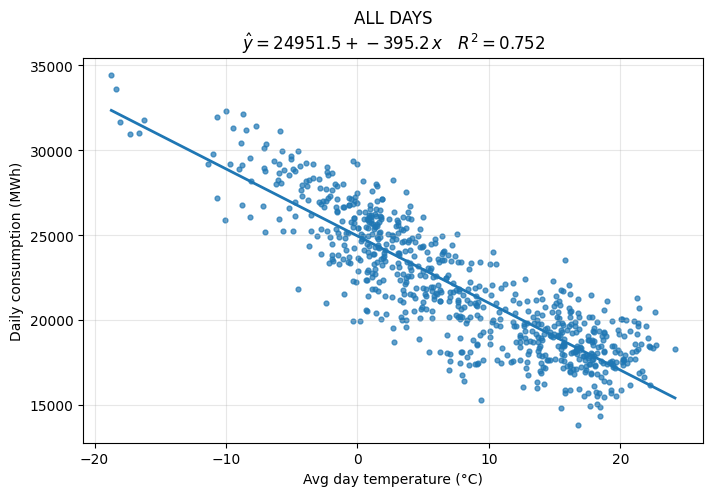

[saved] output\regression_workdays.png


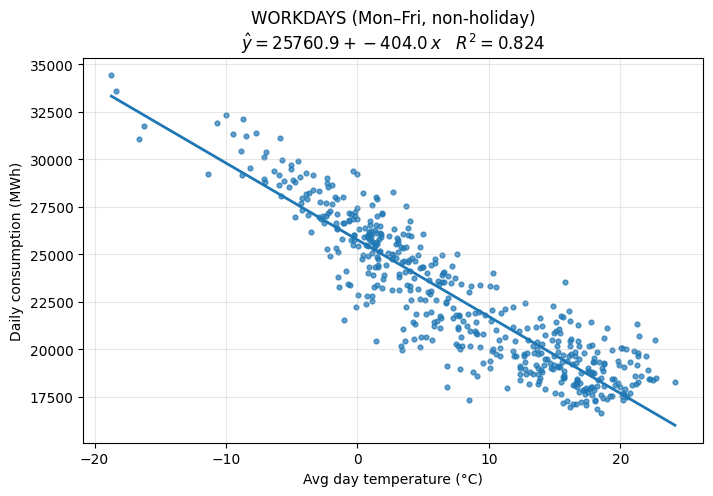

[saved] output\regression_offdays.png


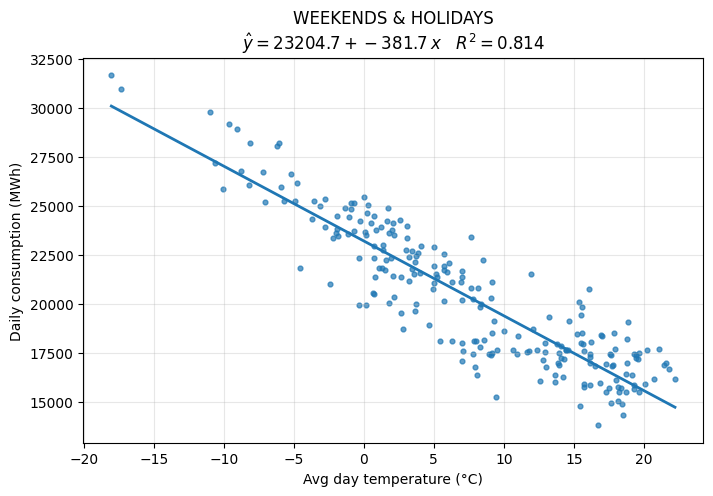

=== MERGED: shape === (731, 5)
=== MERGED: date range === 2023-09-22 00:00:00 → 2025-09-21 00:00:00

=== MERGED: dtypes ===
sum_cons_date         datetime64[ns]
sum_el_daily_value           float64
hour_day_value               Float64
is_weekend                      bool
is_holiday                      bool
dtype: object

=== MERGED: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sum_cons_date       731 non-null    datetime64[ns]
 1   sum_el_daily_value  731 non-null    float64       
 2   hour_day_value      731 non-null    Float64       
 3   is_weekend          731 non-null    bool          
 4   is_holiday          731 non-null    bool          
dtypes: Float64(1), bool(2), datetime64[ns](1), float64(1)
memory usage: 19.4 KB

[saved] output\reg_daily_merged_all.csv
[saved] output\reg_daily_merged_la

In [7]:
# --- Regression (daily): preview (exact last 30 days) + fit + plot + dtypes + optional CSV/PNG ---
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
N_DAYS = 30               # exact number of days to preview
SAVE_CSV = True
SAVE_PNG = True
OUTDIR = Path("output")
FIG_DPI = 130

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from regression_analysis import load_daily_frames, run_linreg
except Exception as e:
    raise ImportError(f"Could not import regression_analysis.py from {SCRIPTS_DIR}: {e}")

# 1) Load merged daily frame (consumption + temperature, EE calendar)
merged = load_daily_frames(months=MONTHS, exclude_today=EXCLUDE_TODAY, tz=TZ).copy()

# Make sure date is datetime for preview slicing
merged["sum_cons_date"] = pd.to_datetime(merged["sum_cons_date"], errors="coerce")

# 2) Preview window: EXACT last N_DAYS (inclusive slice)
idxed = merged.set_index("sum_cons_date").sort_index()
if idxed.empty:
    raise RuntimeError("Merged dataset is empty.")
end_d = idxed.index.max()
start_d = end_d - pd.Timedelta(days=N_DAYS - 1)  # inclusive start..end -> exactly N_DAYS rows
last_30d = idxed.loc[start_d:end_d].reset_index()
print(f"Rows in preview: {len(last_30d)} (target: {N_DAYS})")

display(last_30d)

# 3) Fit regression(s)
def _fit_and_pack(df, label):
    """Fit using run_linreg and pack metrics into a dict."""
    x = df["hour_day_value"].to_numpy(dtype=float)
    y = df["sum_el_daily_value"].to_numpy(dtype=float)
    slope, intercept, r, r2, p, rmse, mae = run_linreg(x, y)
    return {
        "label": label,
        "slope": slope,
        "intercept": intercept,
        "r": r,
        "r2": r2,
        "p_value": p,
        "rmse": rmse,
        "mae": mae,
        "nrows": len(df),
        "date_min": df["sum_cons_date"].min(),
        "date_max": df["sum_cons_date"].max(),
    }

metrics_rows = []
# ALL days
metrics_rows.append(_fit_and_pack(merged, "ALL_DAYS"))

# Segments (if flags present)
has_flags = {"is_weekend", "is_holiday"}.issubset(merged.columns)
if has_flags:
    workdays = merged[(~merged["is_weekend"]) & (~merged["is_holiday"])].copy()
    offdays  = merged[( merged["is_weekend"]) | ( merged["is_holiday"])].copy()
    if not workdays.empty:
        metrics_rows.append(_fit_and_pack(workdays, "WORKDAYS"))
    if not offdays.empty:
        metrics_rows.append(_fit_and_pack(offdays, "WEEKENDS_HOLIDAYS"))

metrics_df = pd.DataFrame(metrics_rows)
display(metrics_df)

# 4) Plot: ALL days (scatter + fit line)
def _plot_scatter_fit(df, title, path_png=None):
    x = df["hour_day_value"].to_numpy(dtype=float)
    y = df["sum_el_daily_value"].to_numpy(dtype=float)
    slope, intercept, r, r2, p, rmse, mae = run_linreg(x, y)

    xline = np.linspace(np.nanmin(x), np.nanmax(x), 100)
    yline = intercept + slope * xline

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(x, y, s=12, alpha=0.7)
    ax.plot(xline, yline, linewidth=2)

    try:
        eq_text = rf"$\hat{{y}} = {intercept:.1f} + {slope:.1f}\,x$   $R^2={r2:.3f}$"
        ax.set_title(f"{title}\n{eq_text}")
    except Exception:
        ax.set_title(title)

    ax.set_xlabel("Avg day temperature (°C)")
    ax.set_ylabel("Daily consumption (MWh)")
    ax.grid(True, alpha=0.3)

    if path_png is not None:
        fig.savefig(path_png, dpi=FIG_DPI)
        print(f"[saved] {path_png}")
    plt.show()

OUTDIR.mkdir(parents=True, exist_ok=True)

_plot_scatter_fit(merged, "ALL DAYS", OUTDIR / "regression_all_days.png" if SAVE_PNG else None)

if has_flags:
    if not workdays.empty:
        _plot_scatter_fit(workdays, "WORKDAYS (Mon–Fri, non-holiday)",
                          OUTDIR / "regression_workdays.png" if SAVE_PNG else None)
    if not offdays.empty:
        _plot_scatter_fit(offdays, "WEEKENDS & HOLIDAYS",
                          OUTDIR / "regression_offdays.png" if SAVE_PNG else None)

# 5) Data types & quick info
print("=== MERGED: shape ===", merged.shape)
print("=== MERGED: date range ===", merged["sum_cons_date"].min(), "→", merged["sum_cons_date"].max())
print("\n=== MERGED: dtypes ===")
print(merged.dtypes)
print("\n=== MERGED: .info() ===")
merged.info()

# 6) Optional: save CSVs
if SAVE_CSV:
    merged.to_csv(OUTDIR / "reg_daily_merged_all.csv", index=False)
    last_30d.to_csv(OUTDIR / f"reg_daily_merged_last{N_DAYS}d_preview.csv", index=False)
    metrics_df.to_csv(OUTDIR / "regression_metrics.csv", index=False)
    print(f"\n[saved] {OUTDIR/'reg_daily_merged_all.csv'}")
    print(f"[saved] {OUTDIR/f'reg_daily_merged_last{N_DAYS}d_preview.csv'}")
    print(f"[saved] {OUTDIR/'regression_metrics.csv'}")


## How to use — Bias correction factors

**What this cell does**
- Calls `bias_analysis.get_bias_factors(mode, segmented, months, exclude_today)` to compute **bias correction factors**:
  - `mode="season"` → factors per **season** (`winter`, `spring`, `summer`, `autumn`)
  - `mode="month"`  → factors per **month** (`1..12`)
  - `segmented=True` → separate factors for **workday/offday** (keys like `workday:winter`, `offday:7`)
- Displays the **factor table** and a **bar chart**, prints **dtypes** and **`.info()`**.
- Optionally **saves**:
  - the factor **table (CSV)** to `./output/`,
  - the factor **map (JSON)** to `./output/`,
  - the **plot (PNG)** to `./output/`.

**Before you run**
- Keep this notebook in the **same folder** as `bias_analysis.py` (and its dependencies).
- Recommended packages: `pandas`, `numpy`, `matplotlib`.
- Today is **excluded** by default (`exclude_today=True`) to avoid partial daily data.

**Parameters in the cell**
- `BIAS_MODE`: `"season"` or `"month"`.
- `SEGMENTED`: `True` to compute separate factors for workday vs offday.
- `MONTHS`: how much history to use (e.g., 24).
- `EXCLUDE_TODAY`: keep `True` to avoid partial data for the last day.
- `SAVE_CSV`, `SAVE_JSON`, `SAVE_PNG`: whether to write outputs to `./output/`.

**Run**
- Execute the cell; you’ll get:
  - a **table** of bias factors (and supporting stats),
  - a **bar chart** (per season or per month; segmented charts show both segments),
  - printed **dtypes** and **`.info()`**,
  - printed **meta** (time window used, segmentation flag).

**Outputs (if saving is enabled)**
- `output/bias_<mode>[_seg]_TABLE_<YYYYMMDD>_<YYYYMMDD>.csv`
- `output/bias_<mode>[_seg]_FACTORS_<YYYYMMDD>_<YYYYMMDD>.json`
- `output/bias_<mode>[_seg]_PLOT_<YYYYMMDD>_<YYYYMMDD>.png`

**Apply to a forecast (example)**
- Use `bias_analysis.apply_bias_to_forecast(df, predicted_col="yhat_consumption", date_col="date_local", factors=factors, mode=BIAS_MODE, segmented=SEGMENTED)` to get a **bias-adjusted** prediction column.

**Troubleshooting**
- *ImportError:* ensure `bias_analysis.py` is reachable from the notebook’s working directory.
- *Still seeing Estonian season labels:* restart the kernel or reload the module after changing `SEASON_MAP` to English; alternatively remap labels in the notebook before plotting.
- *Empty/odd outputs:* adjust `MONTHS`, confirm upstream regression/merging works, and keep all data in **Europe/Tallinn**.


=== META ===
BiasMeta(mode='season', segmented=True, months=24, exclude_today=True, period_start='20230922', period_end='20250921', schema_version='1.0')

=== FACTOR TABLE (head) ===


,segment,season,avg_bias_factor,months
0,offday,autumn,1.020618,7
1,offday,spring,0.945470,6
2,offday,summer,1.013215,6
3,offday,winter,1.025740,6
4,workday,autumn,1.009129,7
5,workday,spring,0.947620,6
6,workday,summer,1.009957,6
7,workday,winter,1.031656,6



=== FACTOR MAP (first 12 keys) ===


,key,factor
0,offday:autumn,1.020618
1,offday:spring,0.945470
2,offday:summer,1.013215
3,offday:winter,1.025740
4,workday:autumn,1.009129
5,workday:spring,0.947620
6,workday:summer,1.009957
7,workday:winter,1.031656


[saved] output\bias_season_seg_PLOT_20230922_20250921.png


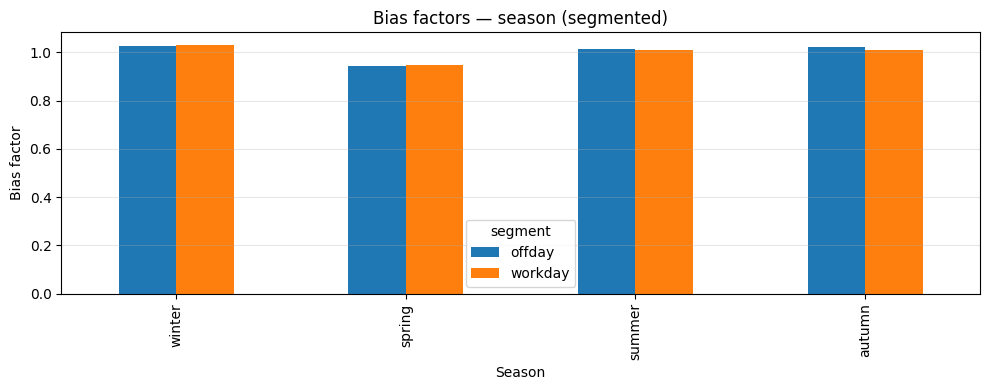


=== TABLE: dtypes ===
segment              object
season             category
avg_bias_factor     float64
months                int64
dtype: object

=== TABLE: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   segment          8 non-null      object  
 1   season           8 non-null      category
 2   avg_bias_factor  8 non-null      float64 
 3   months           8 non-null      int64   
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 536.0+ bytes
[saved] output\bias_season_seg_TABLE_20230922_20250921.csv
[saved] output\bias_season_seg_FACTORS_20230922_20250921.json


In [13]:
# --- Bias correction factors: table + plot + dtypes + optional CSV/JSON/PNG (robust) ---
from pathlib import Path
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
BIAS_MODE = "season"   # 'season' or 'month'
SEGMENTED = True       # True -> separate factors for workday/offday
MONTHS = 24
EXCLUDE_TODAY = True
SAVE_CSV = True
SAVE_JSON = True
SAVE_PNG = True
OUTDIR = Path("output")
FIG_DPI = 130

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from bias_analysis import get_bias_factors, apply_bias_to_forecast
except Exception as e:
    raise ImportError(f"Could not import bias_analysis.py from {SCRIPTS_DIR}: {e}")

# 1) Compute bias factors
factors, meta, table = get_bias_factors(
    mode=BIAS_MODE,
    segmented=SEGMENTED,
    months=MONTHS,
    exclude_today=EXCLUDE_TODAY,
)

# Guard: empty table
if table is None or table.empty:
    raise RuntimeError("Bias table is empty. Increase MONTHS or check upstream regression data.")

# Normalize columns for plotting/sorting
table = table.copy()

# Ensure numeric type for plotting
if "avg_bias_factor" in table.columns:
    table["avg_bias_factor"] = pd.to_numeric(table["avg_bias_factor"], errors="coerce")

# Season ordering detection (supports English or Estonian labels)
SEASON_ORDER_EN = ["winter", "spring", "summer", "autumn"]
SEASON_ORDER_ET = ["talv", "kevad", "suvi", "sügis"]

if "season" in table.columns:
    seasons_present = pd.Series(table["season"].dropna().astype(str).unique()).tolist()
    # pick the order that matches labels present; otherwise, fall back to the current order
    if any(s in SEASON_ORDER_EN for s in seasons_present):
        season_order = [s for s in SEASON_ORDER_EN if s in seasons_present]
    elif any(s in SEASON_ORDER_ET for s in seasons_present):
        season_order = [s for s in SEASON_ORDER_ET if s in seasons_present]
    else:
        season_order = sorted(seasons_present)
    # Use an ordered categorical for stable plotting
    table["season"] = pd.Categorical(table["season"], season_order, ordered=True)

# Month as integer 1..12 for clean sorting/axis labels
if "month_num" in table.columns:
    table["month_num"] = pd.to_numeric(table["month_num"], errors="coerce").astype("Int64")

# Pretty-print meta (dataclass)
print("=== META ===")
print(meta)

# Show table and factor map preview
print("\n=== FACTOR TABLE (head) ===")
display(table.head(12))

print("\n=== FACTOR MAP (first 12 keys) ===")
fact_df = pd.DataFrame(list(factors.items()), columns=["key", "factor"]).sort_values("key")
display(fact_df.head(12))

# 2) Plot — bar chart for season or month, segmented-aware (pivot_table for safety)
OUTDIR.mkdir(parents=True, exist_ok=True)
png_name = f"bias_{BIAS_MODE}{'_seg' if SEGMENTED else ''}_PLOT_{meta.period_start}_{meta.period_end}.png"
png_path = OUTDIR / png_name

def _ensure_numeric_df(df: pd.DataFrame) -> pd.DataFrame:
    """Coerce all columns to numeric where possible; drop rows/cols that are entirely NaN afterwards."""
    df = df.apply(pd.to_numeric, errors="coerce")
    df = df.dropna(how="all", axis=0).dropna(how="all", axis=1)
    return df

def _plot_bias_table(tbl: pd.DataFrame, mode: str, segmented: bool, out_path=None):
    fig, ax = plt.subplots(figsize=(10, 4))

    if not segmented:
        if mode == "season":
            s = (tbl.set_index("season")["avg_bias_factor"]
                    .sort_index())
            s = pd.to_numeric(s, errors="coerce").dropna()
            if s.empty:
                raise TypeError("No numeric data to plot (season, unsegmented). "
                                "Check labels and avg_bias_factor.")
            s.plot(kind="bar", ax=ax)
            ax.set_xlabel("Season")
        else:  # month
            s = (tbl.set_index("month_num")["avg_bias_factor"]
                    .sort_index())
            s = pd.to_numeric(s, errors="coerce").dropna()
            if s.empty:
                raise TypeError("No numeric data to plot (month, unsegmented).")
            s.plot(kind="bar", ax=ax)
            ax.set_xlabel("Month (1..12)")
        ax.set_ylabel("Bias factor")
        ax.set_title(f"Bias factors — {mode} (unsegmented)")
    else:
        if mode == "season":
            pvt = (tbl.pivot_table(
                        index="season", columns="segment",
                        values="avg_bias_factor", aggfunc="mean")
                      .sort_index())
            # enforce detected season order if available
            if "season" in tbl.columns and isinstance(tbl["season"].dtype, pd.CategoricalDtype):
                pvt = pvt.reindex(tbl["season"].cat.categories)
            pvt = _ensure_numeric_df(pvt)
            if pvt.empty:
                raise TypeError("No numeric data to plot (season, segmented). "
                                "Possible reason: label mismatch (EN vs ET) or all-NaN after coercion.")
            pvt.plot(kind="bar", ax=ax)
            ax.set_xlabel("Season")
        else:  # month
            pvt = (tbl.pivot_table(
                        index="month_num", columns="segment",
                        values="avg_bias_factor", aggfunc="mean")
                      .sort_index())
            pvt = _ensure_numeric_df(pvt)
            if pvt.empty:
                raise TypeError("No numeric data to plot (month, segmented).")
            pvt.plot(kind="bar", ax=ax)
            ax.set_xlabel("Month (1..12)")
        ax.set_ylabel("Bias factor")
        ax.set_title(f"Bias factors — {mode} (segmented)")

    ax.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    if out_path is not None:
        fig.savefig(out_path, dpi=FIG_DPI)
        print(f"[saved] {out_path}")
    plt.show()

_plot_bias_table(table, BIAS_MODE, SEGMENTED, png_path if SAVE_PNG else None)

# 3) Data types & quick info
print("\n=== TABLE: dtypes ===")
print(table.dtypes)
print("\n=== TABLE: .info() ===")
table.info()

# 4) Optional: save artifacts (CSV + JSON factor map)
if SAVE_CSV:
    csv_name = f"bias_{BIAS_MODE}{'_seg' if SEGMENTED else ''}_TABLE_{meta.period_start}_{meta.period_end}.csv"
    csv_path = OUTDIR / csv_name
    table.to_csv(csv_path, index=False)
    print(f"[saved] {csv_path}")

if SAVE_JSON:
    json_name = f"bias_{BIAS_MODE}{'_seg' if SEGMENTED else ''}_FACTORS_{meta.period_start}_{meta.period_end}.json"
    json_path = OUTDIR / json_name
    with open(json_path, "w", encoding="utf-8") as f:
        json.dump(factors, f, ensure_ascii=False, indent=2)
    print(f"[saved] {json_path}")

# 5) (Optional) How to apply to a forecast — small demo (commented)
# from el_consumption_forecast import forecast_next7
# daily_fc = forecast_next7(
#     mode=BIAS_MODE,
#     segmented_bias=SEGMENTED,      # if SEGMENTED=True you likely want forecast rows to carry 'segment'
#     months_hist=MONTHS,
# )
# daily_fc_bias = apply_bias_to_forecast(
#     df=daily_fc,
#     predicted_col="yhat_consumption",
#     date_col="date_local",
#     factors=factors,
#     mode=BIAS_MODE,
#     segmented=SEGMENTED,
#     out_col="yhat_consumption_bias_adj",
# )
# display(daily_fc_bias)


## How to use — Temperature forecast (next 7 days)

**What this cell does**
- Calls `temp_forecast.get_next7_forecast(...)` to fetch a **7-day temperature forecast** as **daily averages** on the **Europe/Tallinn** calendar (exactly **tomorrow → +6 days**, i.e., 7 **complete** future days).
- Displays the **7 forecast rows**, draws a **line chart** of `EE_avg`, prints **dtypes** and **`.info()`**.
- Optionally saves:
  - the forecast CSV to `./output/temp_forecast_daily_next7_tallinn_YYYYMMDD_YYYYMMDD.csv`  
    *(dates taken from the forecast index for accuracy)*  
  - the figure PNG to `./output/temp_forecast_daily_next7.png`.

**Before you run**
- Place the notebook in the **same folder** as `temp_forecast.py`.
- Required packages: `pandas`, `matplotlib`, `meteostat`.

**Parameters in the cell**
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `SAVE_CSV`, `SAVE_PNG`: whether to save outputs.
- Optional: pass custom Meteostat `Point`s via `get_next7_forecast(points=...)`.

**Run**
- Execute the cell. You’ll see:
  - the **7-row** table with `EE_avg` and city columns,
  - a **line chart** of `EE_avg`,
  - printed **dtypes** and **`.info()`**.

**Customize**
- Show only specific cities: select columns after loading (e.g., `df[["Tallinn","EE_avg"]]`).
- Prefer bars? Use a bar chart for `EE_avg`.
- Overlay city lines: `df[city_cols].plot(ax=ax)` after plotting `EE_avg`.

**Troubleshooting**
- *ImportError:* ensure `temp_forecast.py` is in the working directory or adjust `sys.path`.
- *Empty output:* Meteostat may be temporarily unavailable or returned no values.

**Sanity-check (optional)**
- Assert the forecast has **exactly 7 rows** and starts **tomorrow**:
  `assert len(df.index) == 7` and `df.index.min().date() == (pd.Timestamp.now(tz=TZ).normalize() + pd.Timedelta(days=1)).date()`.


,date_local,Tallinn,Tartu,Pärnu,Narva,Kuressaare,EE_avg
0,2025-09-23,11.5,10.5,11.8,10.2,12.8,11.4
1,2025-09-24,10.3,7.9,9.9,8.8,10.1,9.4
2,2025-09-25,10.9,9.2,11.5,10.1,11.8,10.7
3,2025-09-26,11.4,10.5,12.4,10.7,11.9,11.4
4,2025-09-27,11.3,10.3,12.3,10.4,11.7,11.2
5,2025-09-28,11.4,9.4,12.0,9.8,11.5,10.8
6,2025-09-29,10.8,8.9,11.0,9.6,11.3,10.3


=== TEMP FORECAST: shape === (7, 6)
=== TEMP FORECAST: date range === 2025-09-23 00:00:00+03:00 → 2025-09-29 00:00:00+03:00

=== TEMP FORECAST: dtypes ===
Tallinn       Float64
Tartu         Float64
Pärnu         Float64
Narva         Float64
Kuressaare    Float64
EE_avg        Float64
dtype: object

=== TEMP FORECAST: .info() ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2025-09-23 00:00:00+03:00 to 2025-09-29 00:00:00+03:00
Freq: D
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tallinn     7 non-null      Float64
 1   Tartu       7 non-null      Float64
 2   Pärnu       7 non-null      Float64
 3   Narva       7 non-null      Float64
 4   Kuressaare  7 non-null      Float64
 5   EE_avg      7 non-null      Float64
dtypes: Float64(6)
memory usage: 434.0 bytes
[saved] output\temp_forecast_daily_next7_tallinn_20250923_20250929.csv


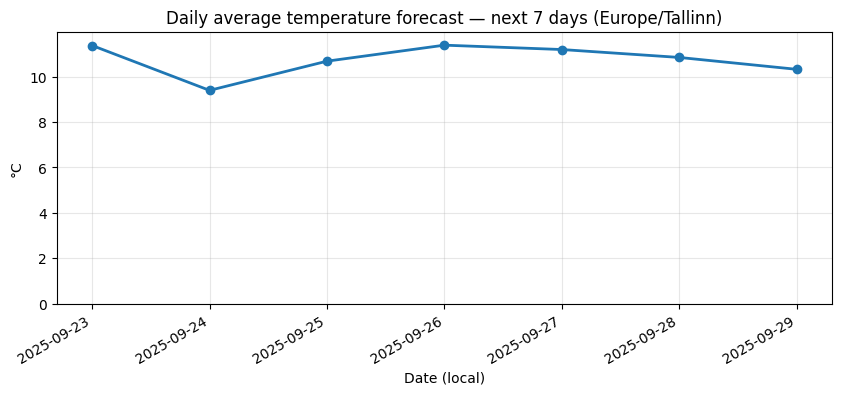

In [35]:
# --- Temperature forecast (next 7 days): table + plot + dtypes + optional CSV/PNG ---
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
TZ = "Europe/Tallinn"
SAVE_CSV = True
SAVE_PNG = True
OUTDIR = Path("output")
FIG_DPI = 130

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from temp_forecast import get_next7_forecast
except Exception as e:
    raise ImportError(f"Could not import temp_forecast.py from {SCRIPTS_DIR}: {e}")

# 1) Get forecast (7 rows, starting tomorrow; index is local calendar dates)
df = get_next7_forecast(tz=TZ).copy()

if df.empty:
    raise RuntimeError("Temperature forecast returned an empty DataFrame.")

# Identify city columns (all except EE_avg)
city_cols = [c for c in df.columns if c != "EE_avg"]

# Pretty print table (date as YYYY-MM-DD)
out_tbl = df.round(1).reset_index()
out_tbl["date_local"] = pd.to_datetime(out_tbl["date_local"]).dt.strftime("%Y-%m-%d")
display(out_tbl[["date_local"] + city_cols + ["EE_avg"]])

# 2) Plot: EE_avg (line). Change to bar if preferred.
fig, ax = plt.subplots(figsize=(10, 4))

# Prepare y-data first
y = df["EE_avg"].to_numpy(dtype=float)
y_min = float(np.nanmin(y))
y_max = float(np.nanmax(y))

# Plot line
ax.plot(df.index, y, marker="o", linewidth=2)

# Y-axis: start at 0 only if all temps >= 0; otherwise show negatives too
bottom = 0.0 if y_min >= 0 else y_min

# Add ~5% headroom at the top (fallback to +1 if flat series)
pad = 0.3 * max(1.0, (y_max - y_min))
top = y_max + pad
ax.set_ylim(bottom=bottom, top=top)

# Optional: draw a baseline at 0 °C when negatives exist (helps readability)
if y_min < 0 < y_max:
    ax.axhline(0, linewidth=1)

ax.set_title("Daily average temperature forecast — next 7 days (Europe/Tallinn)")
ax.set_xlabel("Date (local)")
ax.set_ylabel("°C")
ax.grid(True, alpha=0.3)
fig.autofmt_xdate()


# 3) Data types & quick info
print("=== TEMP FORECAST: shape ===", df.shape)
print("=== TEMP FORECAST: date range ===", df.index.min(), "→", df.index.max())
print("\n=== TEMP FORECAST: dtypes ===")
print(df.dtypes)
print("\n=== TEMP FORECAST: .info() ===")
df.info()

# Sanity-check: exactly 7 calendar days, starting tomorrow (local)
tomorrow_local = pd.Timestamp.now(tz=TZ).normalize() + pd.Timedelta(days=1)
idx_local = pd.to_datetime(df.index)  # daily local dates per module contract
assert len(idx_local) == 7, "Forecast should have 7 rows"
assert idx_local.min().normalize() == tomorrow_local, "Forecast must start tomorrow (local)"
assert idx_local.max().normalize() == tomorrow_local + pd.Timedelta(days=6), "Forecast must span 7 days"


# 4) Optional: save CSV with period taken from the actual DataFrame index
if SAVE_CSV:
    # Use the forecast’s own date range, not "today + offsets", to avoid drift
    start = pd.to_datetime(df.index.min())
    end   = pd.to_datetime(df.index.max())
    s_str, e_str = start.strftime("%Y%m%d"), end.strftime("%Y%m%d")

    out_tbl = df.round(1).reset_index()
    out_tbl["date_local"] = pd.to_datetime(out_tbl["date_local"]).dt.strftime("%Y-%m-%d")
    csv_path = OUTDIR / f"temp_forecast_daily_next7_tallinn_{s_str}_{e_str}.csv"
    out_tbl.to_csv(csv_path, index=False)
    print(f"[saved] {csv_path}")



## How to use — Daily consumption forecast (next 7 days)

**What this cell does**
- Calls `el_consumption_forecast.forecast_next7(...)` to produce a **7-day daily consumption forecast** covering **7 complete days starting tomorrow** on the **Europe/Tallinn** calendar.
- The output `yhat_consumption` is **bias-adjusted** according to your settings (`BIAS_MODE`, `SEGMENTED_BIAS`).
- Displays the **7 forecast rows**, draws a **dual-axis chart** (bars = consumption, line = temperature), and prints **dtypes** / **`.info()`**.
- Optionally saves:
  - the forecast CSV to `./output/forecast_consumption_daily_next7_{mode_tag}_tallinn_YYYYMMDD_YYYYMMDD.csv`
    - where `{mode_tag}` is `season` or `month`, with `'_seg'` appended if `SEGMENTED_BIAS=True`
  - the figure PNG to `./output/forecast_consumption_daily_next7.png`

**Before you run**
- Keep the notebook in the **same folder** as `el_consumption_forecast.py` (and its dependencies).
- Recommended packages: `pandas`, `numpy`, `matplotlib`, `holidays` (EE holidays), `meteostat`.
- Upstream scripts should be functional: `bias_analysis.py`, `regression_analysis.py`, `temp_forecast.py`.

**Parameters in the cell**
- `BIAS_MODE`: `"season"` or `"month"` — which bias factors to apply.
- `SEGMENTED_BIAS`: `True` applies bias by segment (`workday`/`offday`) *and* season/month; `False` ignores segment.
- `MONTHS_HIST`: how much history to use for regressions and bias (in months).
- `TEMP_MODULE` / `TEMP_CSV`: temperature forecast source (module or CSV).  
  If you pass `TEMP_CSV`, ensure it has **exactly 7 rows** for **tomorrow..+6**, aligned to **local midnight**.
- `SAVE_CSV`, `SAVE_PNG`: whether to save outputs.

**Run**
- Execute the cell. You’ll get:
  - a **7-row** table (`date_local`, `yhat_consumption`, `EE_avg_temp_C`, `segment`, `season`, `bias_factor`, …),
  - a **dual-axis** chart,
  - printed **dtypes** and **`.info()`**.

**Customize**
- Switch bias mode: set `BIAS_MODE = "month"` or `"season"`.
- Turn segmented bias off: `SEGMENTED_BIAS = False`.
- Provide an explicit temperature source: set `TEMP_MODULE = "temp_forecast.py"` or `TEMP_CSV = "path/to/temp.csv"`.
- If you prefer the legacy CSV name without the mode tag, adjust the save block accordingly.

**Troubleshooting**
- *ImportError:* ensure `el_consumption_forecast.py` and its dependencies are reachable.
- *7-day window check fails:* confirm the temperature forecast covers **7 complete local days** starting **tomorrow**, and that time zones are consistent (`Europe/Tallinn`).
- *Missing columns or NaN values:* verify upstream regression, bias factors, and temperature inputs; ensure seasons are **English** if your bias factors expect that.


,date_local,weekday,is_weekend,is_holiday,segment,season,month_num,EE_avg_temp_C,bias_key,bias_factor,yhat_base,yhat_consumption
0,2025-09-23 00:00:00+03:00,Tuesday,False,False,workday,autumn,9,11.37,workday:autumn,1.009129,21167.99,21361.23
1,2025-09-24 00:00:00+03:00,Wednesday,False,False,workday,autumn,9,9.39,workday:autumn,1.009129,21966.52,22167.05
2,2025-09-25 00:00:00+03:00,Thursday,False,False,workday,autumn,9,10.68,workday:autumn,1.009129,21446.74,21642.52
3,2025-09-26 00:00:00+03:00,Friday,False,False,workday,autumn,9,11.38,workday:autumn,1.009129,21161.93,21355.12
4,2025-09-27 00:00:00+03:00,Saturday,True,False,offday,autumn,9,11.19,offday:autumn,1.020618,18933.29,19323.65
5,2025-09-28 00:00:00+03:00,Sunday,True,False,offday,autumn,9,10.84,offday:autumn,1.020618,19066.23,19459.34
6,2025-09-29 00:00:00+03:00,Monday,False,False,workday,autumn,9,10.32,workday:autumn,1.009129,21591.83,21788.94


Bias coverage: 7/7 (100.0%)
[saved] output\forecast_consumption_daily_next7.png


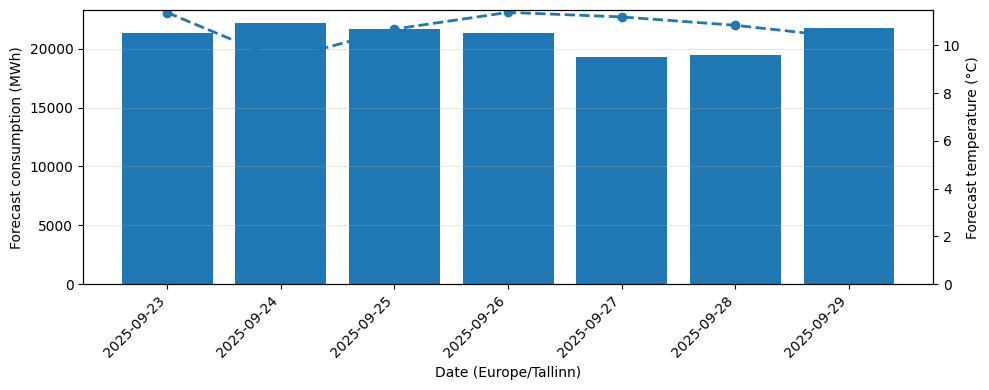

=== DAILY FORECAST: shape === (7, 12)
=== DAILY FORECAST: date range === 2025-09-23 00:00:00+03:00 → 2025-09-29 00:00:00+03:00

=== DAILY FORECAST: dtypes ===
date_local          datetime64[ns, Europe/Tallinn]
weekday                                     object
is_weekend                                    bool
is_holiday                                    bool
segment                                     object
season                                      object
month_num                                    int32
EE_avg_temp_C                              float64
bias_key                                    object
bias_factor                                float64
yhat_base                                  float64
yhat_consumption                           float64
dtype: object

=== DAILY FORECAST: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype                         
---  ------

In [23]:
# --- Daily consumption forecast (next 7 days): table + plot + dtypes + optional CSV/PNG (hardened) ---
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
BIAS_MODE = "season"       # 'season' or 'month'
SEGMENTED_BIAS = True      # apply segment-specific bias (workday/offday)
MONTHS_HIST = 24           # history used to fit regressions and bias
TEMP_MODULE = "temp_forecast.py"  # None to auto-detect, or path/module name
TEMP_CSV = None            # alternative CSV path (string) if you prefer CSV
SAVE_CSV = True
SAVE_PNG = True
TZ = "Europe/Tallinn"
OUTDIR = Path("output")
FIG_DPI = 130

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from el_consumption_forecast import forecast_next7
except Exception as e:
    raise ImportError(f"Could not import el_consumption_forecast.py from {SCRIPTS_DIR}: {e}")

# 1) Run forecast (7 rows, starting tomorrow, Europe/Tallinn)
out = forecast_next7(
    mode=BIAS_MODE,
    segmented_bias=SEGMENTED_BIAS,
    months_hist=MONTHS_HIST,
    temp_module=TEMP_MODULE,
    temp_csv=TEMP_CSV,
).copy()

# 1a) Require columns & coerce numerics for plotting/validation
REQUIRED = {"date_local", "yhat_consumption", "EE_avg_temp_C"}
missing_cols = REQUIRED - set(out.columns)
if missing_cols:
    raise RuntimeError(f"Forecast is missing required columns: {sorted(missing_cols)}")

out["yhat_consumption"] = pd.to_numeric(out["yhat_consumption"], errors="coerce")
out["EE_avg_temp_C"]    = pd.to_numeric(out["EE_avg_temp_C"], errors="coerce")

# --- Sanity checks: 7 complete days starting tomorrow (local) ---
dates = pd.to_datetime(out["date_local"], errors="coerce")
if dates.dt.tz is None:
    dates = dates.dt.tz_localize(TZ)
else:
    dates = dates.dt.tz_convert(TZ)

if len(out) != 7:
    raise RuntimeError(f"Expected 7 rows, got {len(out)}.")

tomorrow_local = pd.Timestamp.now(tz=TZ).normalize() + pd.Timedelta(days=1)
expected = pd.date_range(start=tomorrow_local, periods=7, freq="D", tz=TZ)

# Compare normalized dates irrespective of order
if not dates.dt.normalize().sort_values().reset_index(drop=True).equals(
        expected.normalize().to_series().reset_index(drop=True)):
    raise RuntimeError("Forecast must cover 7 consecutive complete days starting tomorrow (Europe/Tallinn).")

# Ensure sorted by date for display/plot/save
out["date_local"] = dates
out = out.sort_values("date_local").reset_index(drop=True)

display(out)

# >>> (1) Bias coverage log — before plotting
try:
    from bias_analysis import get_bias_factors
    factors, _meta, _tbl = get_bias_factors(
        mode=BIAS_MODE, segmented=SEGMENTED_BIAS, months=MONTHS_HIST
    )
    if "bias_key" in out.columns:
        keys = out["bias_key"].astype(str).tolist()
        hits = sum(k in factors for k in keys)
        missing = sorted({k for k in keys if k not in factors})
        pct = 100.0 * hits / len(keys) if len(keys) else 0.0
        print(f"Bias coverage: {hits}/{len(keys)} ({pct:.1f}%)")
        if missing:
            print(f"[warn] Missing factor keys: {', '.join(missing)}")
    else:
        print("[warn] Column 'bias_key' not found in forecast output.")
except Exception as e:
    print(f"[warn] Could not compute bias coverage: {e}")

# >>> (2) NaN guards
if out["yhat_consumption"].isna().any():
    n = int(out["yhat_consumption"].isna().sum())
    print(f"[warn] {n} forecast row(s) are NaN in 'yhat_consumption' "
          f"(possible missing temperature or unmatched factors).")
if out["EE_avg_temp_C"].isna().any():
    m = int(out["EE_avg_temp_C"].isna().sum())
    print(f"[warn] {m} row(s) have NaN in 'EE_avg_temp_C'.")

# 2) Plot (dual-axis: bars = yhat_consumption, line = EE_avg_temp_C)
def dual_axis_daily_plot(df: pd.DataFrame, path_png=None):
    dts = pd.to_datetime(df["date_local"])
    x = np.arange(len(dts))
    y_cons = df["yhat_consumption"].to_numpy(dtype=float)
    y_temp = df["EE_avg_temp_C"].to_numpy(dtype=float)

    fig, ax1 = plt.subplots(figsize=(10, 4))

    # Bars: consumption
    ax1.bar(x, y_cons)
    ax1.set_ylabel("Forecast consumption (MWh)")
    ax1.set_ylim(bottom=0)
    ax1.grid(True, axis="y", alpha=0.3)

    # Line: temperature (twin axis)
    ax2 = ax1.twinx()
    ax2.plot(x, y_temp, marker="o", linestyle="--", linewidth=2)
    ax2.set_ylabel("Forecast temperature (°C)")
    # Guard: if all temps are NaN, skip lower bound setting
    if not np.isnan(y_temp).all():
        ax2.set_ylim(bottom=min(0, np.nanmin(y_temp)))

    ax1.set_xticks(x)
    ax1.set_xticklabels([d.strftime("%Y-%m-%d") for d in dts], rotation=45, ha="right")
    ax1.set_xlabel("Date (Europe/Tallinn)")
    plt.tight_layout()

    if path_png is not None:
        fig.savefig(path_png, dpi=FIG_DPI)
        print(f"[saved] {path_png}")
    plt.show()

OUTDIR.mkdir(parents=True, exist_ok=True)
png_path = OUTDIR / "forecast_consumption_daily_next7.png" if SAVE_PNG else None
dual_axis_daily_plot(out, png_path)

# 3) Data types & quick info
print("=== DAILY FORECAST: shape ===", out.shape)
print("=== DAILY FORECAST: date range ===", out["date_local"].min(), "→", out["date_local"].max())
print("\n=== DAILY FORECAST: dtypes ===")
print(out.dtypes)
print("\n=== DAILY FORECAST: .info() ===")
out.info()

# 4) Optional: save CSV with period from the actual DataFrame
# >>> (3) Date as string in CSV — already implemented below
if SAVE_CSV:
    start = pd.to_datetime(out["date_local"]).min()
    end   = pd.to_datetime(out["date_local"]).max()
    s_str, e_str = start.strftime("%Y%m%d"), end.strftime("%Y%m%d")
    mode_tag = f"{BIAS_MODE}{'_seg' if SEGMENTED_BIAS else ''}"
    csv_path = OUTDIR / f"forecast_consumption_daily_next7_{mode_tag}_tallinn_{s_str}_{e_str}.csv"
    # Save a clean view (string dates for portability)
    out_to_save = out.copy()
    out_to_save["date_local"] = pd.to_datetime(out_to_save["date_local"]).dt.strftime("%Y-%m-%d")
    out_to_save.to_csv(csv_path, index=False)
    print(f"\n[saved] {csv_path}")


## How to use — Weekday load profiles (24×7 share matrix)

**What this cell does**
- Builds a **24×7 matrix** of average hourly shares per weekday using `weekday_profile.get_weekday_hour_share_matrix(...)`.  
  Each weekday column sums to **1.0**. Uses **Europe/Tallinn** time, is **DST-aware**, and (by default) excludes **today** and **EE public holidays** from training.
- Shows the **matrix preview** and **days used** (the last *N* dates per weekday).
- Draws a **heatmap** (hours × weekday) and prints **dtypes** / **`.info()`**.
- Optionally saves two CSVs to `./output/`: the **matrix** and the **days used**.

**Before you run**
- Place the notebook in the **same folder** as `weekday_profile.py` (and `elering_consumption.py` if you fetch hourly data via API).
- Required packages: `pandas`, `matplotlib`, and `holidays` (recommended for EE public holidays).

**Parameters in the cell**
- `LAST_N`: how many **most recent occurrences** of each weekday to average (e.g., 6).
- `EXCLUDE_TODAY`: keep `True` to avoid today’s (partial) day in training.
- `HOURLY_CSV` (optional): path to an hourly CSV; if omitted, the cell uses `elering_consumption.get_hourly_consumption(...)`.
- `CSV_TZ`: time zone to assume for **naive** timestamps in `HOURLY_CSV` (e.g., `"UTC"`).
- `MONTHS`: how much history to scan.
- `SAVE_CSV`: whether to save outputs to `./output/`.

**Run**
- Execute the cell; you’ll see:
  - the **24×7** matrix and the **days used** table,
  - a **heatmap** of shares,
  - printed **dtypes** and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/weekday_share_matrix_last{LAST_N}_months{MONTHS}.csv`
- `output/weekday_days_used_last{LAST_N}_months{MONTHS}.csv`

**Customize**
- To include or exclude **public holidays** in training, adjust the holiday-filtering logic in `weekday_profile.py` (note: `EXCLUDE_TODAY` only controls inclusion of **today**, not holidays).
- To train from a specific data dump, set `HOURLY_CSV="path/to/hourly.csv"` and `CSV_TZ="UTC"` if the file is UTC-naive.
- If a weekday is missing in your data window, the preview will still render (columns are reindexed to a fixed weekday order), but you’ll see a warning.

**Troubleshooting**
- *ImportError:* ensure the scripts are reachable from the notebook folder.
- *Empty or non-24×7 matrix:* widen `MONTHS`, reduce `LAST_N`, or verify that “exclude today / exclude holidays” didn’t drop all rows. Also check that hourly input uses the intended time zone.


weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour_local,,,,,,,
0,0.0335,0.0345,0.0355,0.0350,0.0362,0.0374,0.0382
1,0.0318,0.0329,0.0341,0.0332,0.0337,0.0361,0.0363
2,0.0313,0.0319,0.0331,0.0326,0.0327,0.0349,0.0352
3,0.0311,0.0315,0.0329,0.0326,0.0326,0.0342,0.0347
4,0.0313,0.0317,0.0331,0.0329,0.0330,0.0341,0.0346
5,0.0326,0.0333,0.0340,0.0338,0.0342,0.0345,0.0348
6,0.0369,0.0379,0.0392,0.0384,0.0382,0.0357,0.0359
7,0.0427,0.0439,0.0451,0.0441,0.0439,0.0383,0.0391
8,0.0468,0.0479,0.0478,0.0483,0.0473,0.0414,0.0424


,weekday,date_local
23,Sunday,2025-09-21
17,Saturday,2025-09-20
5,Friday,2025-09-19
29,Thursday,2025-09-18
41,Wednesday,2025-09-17
35,Tuesday,2025-09-16
11,Monday,2025-09-15
22,Sunday,2025-09-14
16,Saturday,2025-09-13
4,Friday,2025-09-12


Max |col_sum - 1.0| = 0.0


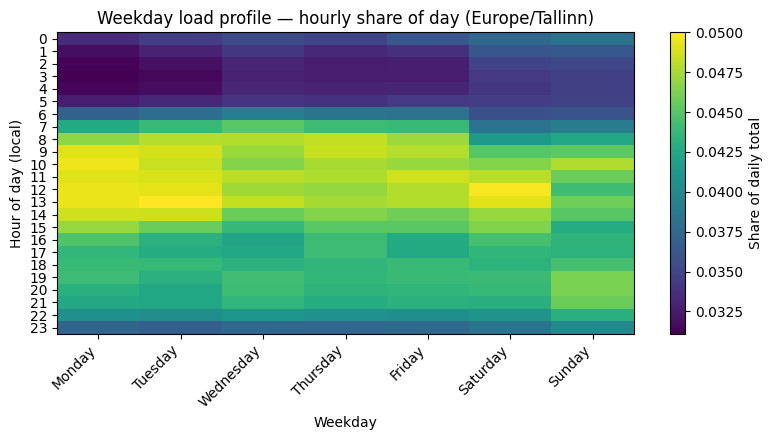


=== MATRIX: dtypes ===
weekday
Monday       float64
Tuesday      float64
Wednesday    float64
Thursday     float64
Friday       float64
Saturday     float64
Sunday       float64
dtype: object

=== DAYS USED: dtypes ===
weekday       object
date_local    object
dtype: object

=== MATRIX: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Monday     24 non-null     float64
 1   Tuesday    24 non-null     float64
 2   Wednesday  24 non-null     float64
 3   Thursday   24 non-null     float64
 4   Friday     24 non-null     float64
 5   Saturday   24 non-null     float64
 6   Sunday     24 non-null     float64
dtypes: float64(7)
memory usage: 1.4 KB

=== DAYS USED: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      ----------

In [19]:
# --- Weekday load profiles: 24×7 share matrix + days used + heatmap + dtypes + optional CSV ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
LAST_N = 6
EXCLUDE_TODAY = True
HOURLY_CSV = None         # e.g., "output/elering_consumption_hourly_last24months_tallinn_*.csv"
CSV_TZ = "Europe/Tallinn" # if HOURLY_CSV has tz-naive timestamps, set their zone (e.g. "UTC")
MONTHS = 24
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from weekday_profile import (
        get_weekday_hour_share_matrix,
        get_weekday_days_used,
        WEEKDAY_ORDER,
    )
except Exception as e:
    raise ImportError(f"Could not import weekday_profile.py from {SCRIPTS_DIR}: {e}")

# 1) Build matrix & days used
M = get_weekday_hour_share_matrix(
    last_n=LAST_N,
    exclude_today=EXCLUDE_TODAY,
    hourly_csv=HOURLY_CSV,
    csv_tz=CSV_TZ,
    months=MONTHS,
)
DU = get_weekday_days_used(
    last_n=LAST_N,
    exclude_today=EXCLUDE_TODAY,
    hourly_csv=HOURLY_CSV,
    csv_tz=CSV_TZ,
    months=MONTHS,
)

# --- Safer preview: order columns by WEEKDAY_ORDER and guard against missing weekdays
missing = [w for w in WEEKDAY_ORDER if w not in M.columns]
if missing:
    print(f"[warn] Missing weekday(s) in profile matrix: {missing}")
M_plot = M.reindex(columns=WEEKDAY_ORDER)

# Ensure 24 hour rows in order if index is hours
try:
    M_plot = M_plot.reindex(index=range(24))
except Exception:
    # If index is already hours (0..23) or something else, we leave as-is
    pass

# Preview tables
display(M_plot.round(4))
display(DU.sort_values("date_local", ascending=False).head(21))

# Quick validation: each weekday column should sum to ~1.0
col_sums = M_plot.sum(axis=0, skipna=True)
max_dev = float((col_sums - 1.0).abs().max())
print("Max |col_sum - 1.0| =", max_dev)
if M_plot.shape[0] != 24:
    print(f"[warn] Expected 24 rows (hours), got {M_plot.shape[0]}.")
if M_plot.shape[1] != len(WEEKDAY_ORDER):
    print(f"[warn] Expected {len(WEEKDAY_ORDER)} columns (weekdays), got {M_plot.shape[1]}.")

# 2) Heatmap (hours × weekday)
fig, ax = plt.subplots(figsize=(8, 4.5))
im = ax.imshow(M_plot.fillna(0.0).to_numpy(dtype=float), aspect="auto", origin="upper")
ax.set_title("Weekday load profile — hourly share of day (Europe/Tallinn)")
ax.set_xlabel("Weekday")
ax.set_ylabel("Hour of day (local)")
ax.set_xticks(range(len(WEEKDAY_ORDER)))
ax.set_xticklabels(WEEKDAY_ORDER, rotation=45, ha="right")
ax.set_yticks(range(24))
fig.colorbar(im, ax=ax, label="Share of daily total")
plt.tight_layout()
plt.show()

# 3) dtypes & info
print("\n=== MATRIX: dtypes ===")
print(M.dtypes)
print("\n=== DAYS USED: dtypes ===")
print(DU.dtypes)
print("\n=== MATRIX: .info() ===")
M.info()
print("\n=== DAYS USED: .info() ===")
DU.info()

# 4) Optional: save CSVs
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    M_plot.to_csv(OUTDIR / f"weekday_share_matrix_last{LAST_N}_months{MONTHS}.csv", index=True)
    DU.to_csv(OUTDIR / f"weekday_days_used_last{LAST_N}_months{MONTHS}.csv", index=False)
    print(f"\n[saved] {OUTDIR / f'weekday_share_matrix_last{LAST_N}_months{MONTHS}.csv'}")
    print(f"[saved] {OUTDIR / f'weekday_days_used_last{LAST_N}_months{MONTHS}.csv'}")


## How to use — Hourly consumption forecast (next 7 days)

**What this cell does**
- Calls `electricity_hourly_forecast.main(...)` to produce a **7-day hourly forecast** in **Europe/Tallinn**, covering **7 complete future days (tomorrow → +6)**.
- Under the hood it:
  1) obtains the **daily forecast** (from a CSV you provide or by calling `forecast_next7`),
  2) builds/uses **weekday load profiles** (DST-aware, EE public holidays handled),
  3) **splits** daily totals into hourly values and **checks sums** match the daily totals.
- Shows a **scrollable preview (first 200 rows)**, verifies **hourly vs daily** sums, draws a **line chart** for the **first forecast day**, and prints **dtypes** / **`.info()`**.
- Optionally saves a CSV to `./output/forecast_consumption_hourly_next7_tallinn_YYYYMMDD_YYYYMMDD.csv` (dates taken from the forecast window).

**Before you run**
- Keep the notebook in the **same folder** as `electricity_hourly_forecast.py` and its dependencies.
- Recommended packages: `pandas`, `matplotlib`, plus whatever your upstream scripts require (`holidays`, `meteostat`).
- If you rely on segmented bias factors upstream, ensure your **daily forecast** rows already reflect the **English seasons** (`winter/spring/summer/autumn`). (This hourly step only splits daily totals; it does not re-apply bias.)

**Parameters in the cell**
- `DAILY_CSV`: path to an existing **daily** forecast (must have **exactly 7 rows** covering **tomorrow..+6**, with at least `date_local` and `yhat_consumption`, **aligned to local midnight**). If `None`, the module computes one internally.
- `MODE` / `SEGMENTED_BIAS` / `MONTHS_HIST` / `TEMP_MODULE` / `TEMP_CSV`: forwarded to the daily-forecast step if `DAILY_CSV=None`.
- `LAST_N`, `HOLIDAY_PROFILE`, `HOURLY_CSV`, `CSV_TZ`, `MONTHS_FOR_PROFILE`: weekday-profile training options.
- `SAVE_CSV`: if `True`, the module saves the hourly CSV to `./output/`.

**Run**
- Execute the cell. You’ll see:
  - a **scrollable preview** of the first rows (default: 200; around DST this may cover less/more than two full days),
  - a **sum check** (hourly → daily),
  - a **line chart** of the first forecast day,
  - printed **dtypes** and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/forecast_consumption_hourly_next7_tallinn_YYYYMMDD_YYYYMMDD.csv`

**Customize**
- Provide a specific **daily forecast CSV** via `DAILY_CSV="path.csv"`.
- Train profiles from a specific hourly history dump via `HOURLY_CSV="path.csv"` and set `CSV_TZ` (e.g., `"UTC"`) if that file is tz-naive.
- Change the preview size (e.g., first 72 rows) or add more plots (overlay by day, heatmap).

**Troubleshooting**
- *ImportError:* ensure the script is reachable from the notebook working directory.
- *Sum mismatch:* verify the profile matrix and DST handling; malformed daily inputs or mismatched time zones can cause discrepancies.


[kontroll] Päevasummad vs yhat_consumption — max |rel_diff| ≈ 0.00000%

=== Hourly forecast (esimesed 48 rida) ===
           datetime_local   weekday  hour_local  consumption_hourly segment season  EE_avg_temp_C  yhat_consumption  bias_factor
2025-09-23 00:00:00+03:00   Tuesday           0          737.891714 workday autumn          11.37          21361.23     1.009129
2025-09-23 01:00:00+03:00   Tuesday           1          703.003875 workday autumn          11.37          21361.23     1.009129
2025-09-23 02:00:00+03:00   Tuesday           2          681.565092 workday autumn          11.37          21361.23     1.009129
2025-09-23 03:00:00+03:00   Tuesday           3          672.970327 workday autumn          11.37          21361.23     1.009129
2025-09-23 04:00:00+03:00   Tuesday           4          678.162544 workday autumn          11.37          21361.23     1.009129
2025-09-23 05:00:00+03:00   Tuesday           5          710.477558 workday autumn          11.37          2136

,datetime_local,weekday,hour_local,consumption_hourly,date_local,segment,season,is_weekend,is_holiday,month_num,EE_avg_temp_C,bias_key,bias_factor,yhat_base,yhat_consumption
0,2025-09-23 00:00:00+03:00,Tuesday,0,737.891714,2025-09-23,workday,autumn,False,False,9,11.37,workday:autumn,1.009129,21167.99,21361.23
1,2025-09-23 01:00:00+03:00,Tuesday,1,703.003875,2025-09-23,workday,autumn,False,False,9,11.37,workday:autumn,1.009129,21167.99,21361.23
2,2025-09-23 02:00:00+03:00,Tuesday,2,681.565092,2025-09-23,workday,autumn,False,False,9,11.37,workday:autumn,1.009129,21167.99,21361.23
3,2025-09-23 03:00:00+03:00,Tuesday,3,672.970327,2025-09-23,workday,autumn,False,False,9,11.37,workday:autumn,1.009129,21167.99,21361.23
4,2025-09-23 04:00:00+03:00,Tuesday,4,678.162544,2025-09-23,workday,autumn,False,False,9,11.37,workday:autumn,1.009129,21167.99,21361.23
5,2025-09-23 05:00:00+03:00,Tuesday,5,710.477558,2025-09-23,workday,autumn,False,False,9,11.37,workday:autumn,1.009129,21167.99,21361.23
6,2025-09-23 06:00:00+03:00,Tuesday,6,810.234926,2025-09-23,workday,autumn,False,False,9,11.37,workday:autumn,1.009129,21167.99,21361.23
7,2025-09-23 07:00:00+03:00,Tuesday,7,937.150941,2025-09-23,workday,autumn,False,False,9,11.37,workday:autumn,1.009129,21167.99,21361.23
8,2025-09-23 08:00:00+03:00,Tuesday,8,1023.620252,2025-09-23,workday,autumn,False,False,9,11.37,workday:autumn,1.009129,21167.99,21361.23
9,2025-09-23 09:00:00+03:00,Tuesday,9,1041.831921,2025-09-23,workday,autumn,False,False,9,11.37,workday:autumn,1.009129,21167.99,21361.23


,date_local,sum_hourly,yhat_consumption,rel_diff
0,2025-09-23,21361.23,21361.23,0.0
1,2025-09-24,22167.05,22167.05,0.0
2,2025-09-25,21642.52,21642.52,0.0
3,2025-09-26,21355.12,21355.12,0.0
4,2025-09-27,19323.65,19323.65,0.0
5,2025-09-28,19459.34,19459.34,0.0
6,2025-09-29,21788.94,21788.94,0.0


Max |rel_diff| = 0.0


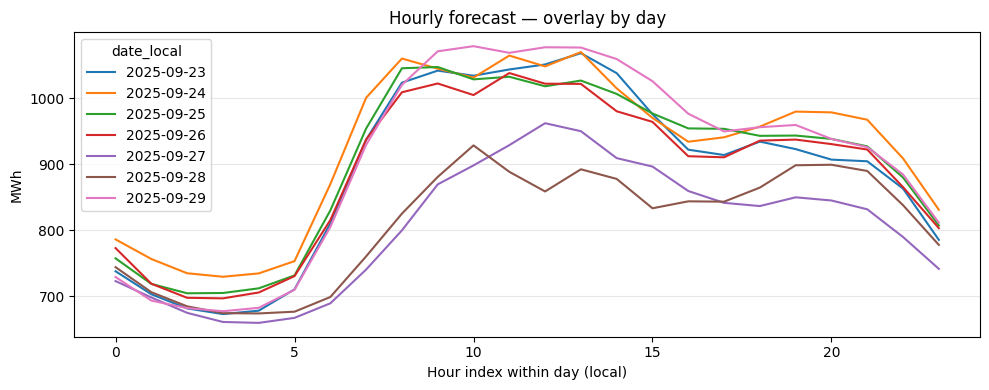

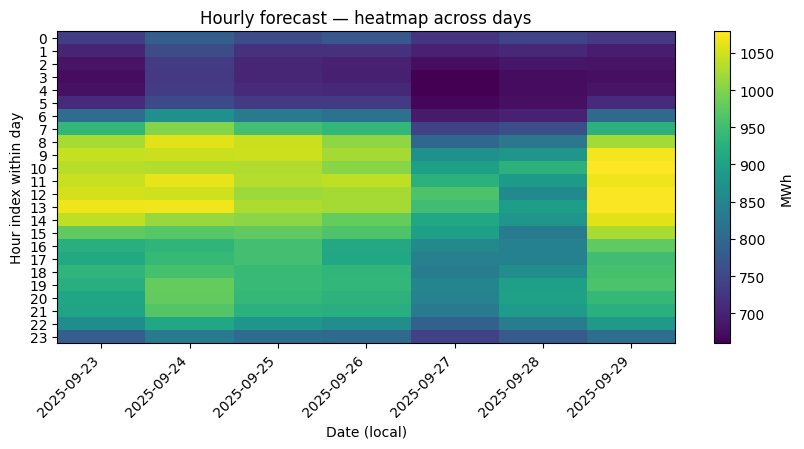

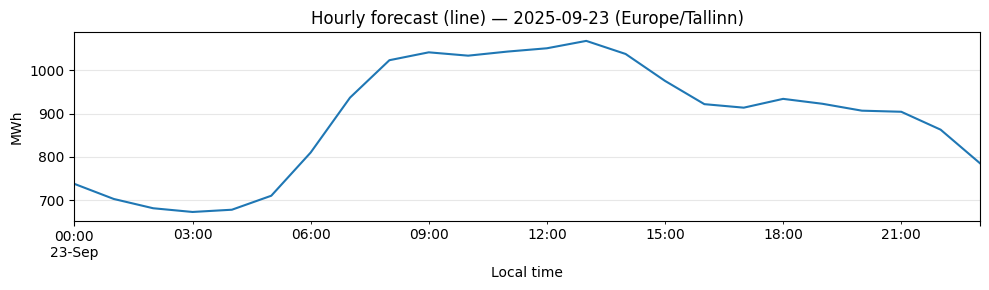


=== HOURLY FORECAST: dtypes ===
datetime_local        datetime64[ns, Europe/Tallinn]
weekday                                       object
hour_local                                     int64
consumption_hourly                           float64
date_local                                    object
segment                                       object
season                                        object
is_weekend                                      bool
is_holiday                                      bool
month_num                                      int32
EE_avg_temp_C                                float64
bias_key                                      object
bias_factor                                  float64
yhat_base                                    float64
yhat_consumption                             float64
dtype: object

=== HOURLY FORECAST: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 15 columns):
 #   Column        

In [26]:
# --- Hourly forecast (next 7 days): scrollable preview + sum check + LINE plot + dtypes; optional CSV (hardened) ---
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display

# (A) Scrollable table helper – avoids truncation in notebooks
def display_scrollable_df(df: pd.DataFrame, n=200, max_height_px=360):
    html = df.head(n).to_html(border=0)
    display(HTML(f"<div style='max-height:{max_height_px}px; overflow:auto; border:1px solid #ddd; padding:6px'>{html}</div>"))

# (B) Pandas display options (adjust to taste)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 0)  # let it expand

# Parameters
DAILY_CSV = None             # e.g., "output/forecast_consumption_daily_next7_..._tallinn_YYYYMMDD_YYYYMMDD.csv"
MODE = "season"
SEGMENTED_BIAS = True
MONTHS_HIST = 24
TEMP_MODULE = "temp_forecast.py"
TEMP_CSV = None

LAST_N = 6
HOLIDAY_PROFILE = "weekday"
HOURLY_CSV = None            # if you want to train profiles from a CSV dump
CSV_TZ = "Europe/Tallinn"    # set to "UTC" if HOURLY_CSV timestamps are naive UTC
MONTHS_FOR_PROFILE = 24
SAVE_CSV = True

# Import module function
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))
from electricity_hourly_forecast import main as run_hourly

# 1) Run hourly forecast
hourly = run_hourly(
    use_daily_csv=DAILY_CSV,
    mode=MODE,
    segmented_bias=SEGMENTED_BIAS,
    months_hist=MONTHS_HIST,
    temp_module=TEMP_MODULE,
    temp_csv=TEMP_CSV,
    last_n=LAST_N,
    holiday_profile=HOLIDAY_PROFILE,
    hourly_csv=HOURLY_CSV,
    csv_tz=CSV_TZ,
    months_for_profile=MONTHS_FOR_PROFILE,
    save_csv=SAVE_CSV,
).copy()

if hourly.empty:
    raise RuntimeError("Hourly forecast returned an empty DataFrame.")

# 1a) Required columns & dtype coercion
REQ = {"datetime_local", "consumption_hourly"}
missing = REQ - set(hourly.columns)
if missing:
    raise RuntimeError(f"Hourly forecast is missing required columns: {sorted(missing)}")

if not pd.api.types.is_datetime64_any_dtype(hourly["datetime_local"]):
    hourly["datetime_local"] = pd.to_datetime(hourly["datetime_local"], errors="coerce")

hourly["consumption_hourly"] = pd.to_numeric(hourly["consumption_hourly"], errors="coerce")
if "yhat_consumption" in hourly.columns:
    hourly["yhat_consumption"] = pd.to_numeric(hourly["yhat_consumption"], errors="coerce")

# 1b) Sanity check — ensure 7 complete consecutive days starting tomorrow (Europe/Tallinn)
TZ = "Europe/Tallinn"
dates_unique = pd.to_datetime(hourly["datetime_local"]).dt.tz_convert(TZ).dt.normalize().drop_duplicates().sort_values()
tomorrow_local = pd.Timestamp.now(tz=TZ).normalize() + pd.Timedelta(days=1)
expected = pd.date_range(start=tomorrow_local, periods=7, freq="D", tz=TZ).normalize()

if len(dates_unique) != 7 or not dates_unique.reset_index(drop=True).equals(expected.to_series().reset_index(drop=True)):
    raise RuntimeError("Hourly forecast must span 7 consecutive complete local days starting tomorrow (Europe/Tallinn).")

# 2) Scrollable preview (first 200 rows)
display_scrollable_df(hourly, n=200, max_height_px=360)

# 3) Sum check: hours -> day
hourly["date_local"] = pd.to_datetime(hourly["datetime_local"]).dt.tz_convert(TZ).dt.strftime("%Y-%m-%d")
check = (hourly.groupby("date_local", as_index=False)["consumption_hourly"]
         .sum()
         .rename(columns={"consumption_hourly": "sum_hourly"}))

# Attach daily totals (from hourly or external DAILY_CSV)
if "yhat_consumption" in hourly.columns:
    daily_in_hourly = (hourly[["date_local", "yhat_consumption"]]
                       .drop_duplicates("date_local"))
    check = check.merge(daily_in_hourly, on="date_local", how="left")
elif DAILY_CSV:
    daily = pd.read_csv(DAILY_CSV)
    # normalize date type to string YYYY-MM-DD
    daily["date_local"] = pd.to_datetime(daily["date_local"], errors="coerce").dt.strftime("%Y-%m-%d")
    daily["yhat_consumption"] = pd.to_numeric(daily["yhat_consumption"], errors="coerce")
    check = check.merge(daily[["date_local", "yhat_consumption"]], on="date_local", how="left")

# Compute relative difference only if yhat is available
if "yhat_consumption" in check.columns and check["yhat_consumption"].notna().any():
    check["rel_diff"] = (check["sum_hourly"] / check["yhat_consumption"]) - 1.0
else:
    check["rel_diff"] = np.nan  # not available

display(check)
if check["rel_diff"].notna().any():
    print("Max |rel_diff| =", float(check["rel_diff"].abs().max()))
else:
    print("Daily totals not provided — rel_diff not computed.")

# --- Extra charts for hourly forecast: (1) overlay by day on hour-index, (2) heatmap across days ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Guard: ensure required columns
REQ = {"datetime_local", "consumption_hourly"}
missing = REQ - set(hourly.columns)
if missing:
    raise RuntimeError(f"Hourly DF missing required columns: {sorted(missing)}")

# Make sure dtypes are correct
if not pd.api.types.is_datetime64_any_dtype(hourly["datetime_local"]):
    hourly["datetime_local"] = pd.to_datetime(hourly["datetime_local"], errors="coerce")
hourly["consumption_hourly"] = pd.to_numeric(hourly["consumption_hourly"], errors="coerce")

# Build day label and hour index within each day (DST-aware: days can be 23/25h)
TZ = "Europe/Tallinn"
h2 = hourly.copy()
h2["date_local"] = pd.to_datetime(h2["datetime_local"]).dt.tz_convert(TZ).dt.strftime("%Y-%m-%d")
h2 = h2.sort_values(["date_local", "datetime_local"])
h2["hour_idx"] = h2.groupby("date_local").cumcount()  # 0..(n_hours-1), handles 23/25h days

# (Option) Compare shapes instead of absolute MWh by normalizing to share-of-day
NORMALIZE_TO_SHARE = False
if NORMALIZE_TO_SHARE:
    day_sum = h2.groupby("date_local")["consumption_hourly"].transform("sum")
    h2["plot_value"] = np.where(day_sum > 0, h2["consumption_hourly"] / day_sum, np.nan)
    y_label = "Share of daily total"
    title_suffix = " (normalized)"
else:
    h2["plot_value"] = h2["consumption_hourly"]
    y_label = "MWh"
    title_suffix = ""

# Pivot to hour_idx × date matrix
pvt = h2.pivot(index="hour_idx", columns="date_local", values="plot_value").sort_index()

# --- (1) Overlay chart: each day as one line on hour index (0..n-1) ---
ax = pvt.plot(figsize=(10, 4), title=f"Hourly forecast — overlay by day{title_suffix}")
ax.set_xlabel("Hour index within day (local)")
ax.set_ylabel(y_label)
ax.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# --- (2) Heatmap: hours (rows) × days (columns) ---
M = pvt.to_numpy(dtype=float)
fig, ax = plt.subplots(figsize=(8.5, 4.6))
im = ax.imshow(M, aspect="auto", origin="upper")  # NaNs will appear as blank/white
ax.set_title(f"Hourly forecast — heatmap across days{title_suffix}")
ax.set_xlabel("Date (local)")
ax.set_ylabel("Hour index within day")
ax.set_xticks(range(pvt.shape[1]))
ax.set_xticklabels(list(pvt.columns), rotation=45, ha="right")
ax.set_yticks(range(pvt.shape[0]))
ax.set_yticklabels(range(pvt.shape[0]))
fig.colorbar(im, ax=ax, label=y_label)
plt.tight_layout()
plt.show()


# 4) LINE chart: first forecast day (DST-aware; day can be 23/25h)
first_day = dates_unique.min().strftime("%Y-%m-%d")
day_slice = hourly[hourly["date_local"] == first_day].copy()
ax = (day_slice.sort_values("datetime_local")
                 .set_index("datetime_local")["consumption_hourly"]
                 .plot(figsize=(10, 3), title=f"Hourly forecast (line) — {first_day} (Europe/Tallinn)"))
ax.set_xlabel("Local time")
ax.set_ylabel("MWh")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5) dtypes & info
print("\n=== HOURLY FORECAST: dtypes ===")
print(hourly.dtypes)
print("\n=== HOURLY FORECAST: .info() ===")
hourly.info()
